In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime as dt

fileName = "TideData.txt"
rawData = np.array([line.split() for line in open(fileName)])
print(rawData)

[['2013' '01' '01' ..., '00' '00' '1.3738']
 ['2013' '01' '01' ..., '01' '00' '1.3718']
 ['2013' '01' '01' ..., '02' '00' '1.3548']
 ..., 
 ['2013' '12' '31' ..., '57' '00' '1.1108']
 ['2013' '12' '31' ..., '58' '00' '1.1148']
 ['2013' '12' '31' ..., '59' '00' '1.0938']]


**Problem 1.**

In [2]:
def p1(unarray):
    arraydate=[]
    for i in range(len(unarray)):
        arraydate.append(dt(int(unarray[i][0]),int(unarray[i][1]),int(unarray[i][2]),int(unarray[i][3]),int(unarray[i][4])))
    return np.array(arraydate)

print(p1(rawData))

[datetime.datetime(2013, 1, 1, 0, 0) datetime.datetime(2013, 1, 1, 0, 1)
 datetime.datetime(2013, 1, 1, 0, 2) ...,
 datetime.datetime(2013, 12, 31, 23, 57)
 datetime.datetime(2013, 12, 31, 23, 58)
 datetime.datetime(2013, 12, 31, 23, 59)]


**Problem 2.**

In [3]:
def p2(unarray):
    values=[]
    for i in range(len(unarray)):
        values.append(float(unarray[i][6]))
    return np.array(values)

print(p2(rawData))

[ 1.3738  1.3718  1.3548 ...,  1.1108  1.1148  1.0938]


**Problem 3.**

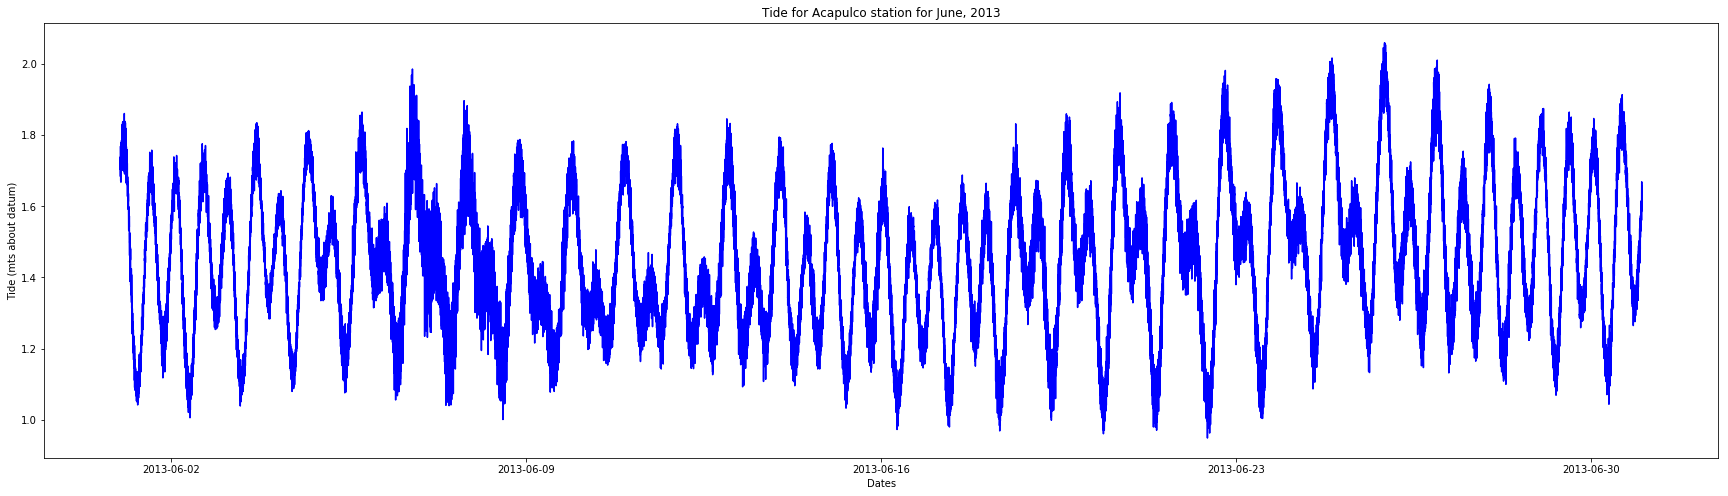

In [4]:
def sacaUnMes(fechas,datos,numMes):
    mesFecha=[]
    mesDatos=[]
    contador=0
    for i in fechas:
        if i.month==numMes:
            mesFecha.append(i)
            mesDatos.append(datos[contador])
        contador+=1
    return mesFecha,mesDatos

def p3(x,y):
    plt.figure(figsize=(30,8))
    plt.plot(x,y,color='b')
    plt.title('Tide for Acapulco station for June, 2013')
    plt.xlabel('Dates')
    plt.ylabel('Tide (mts about datum)')
    plt.savefig('tide.png',dpi=400) 
    return plt.show()

junio=sacaUnMes(p1(rawData),p2(rawData),6)
p3(junio[0],junio[1])

**Problem 4.**

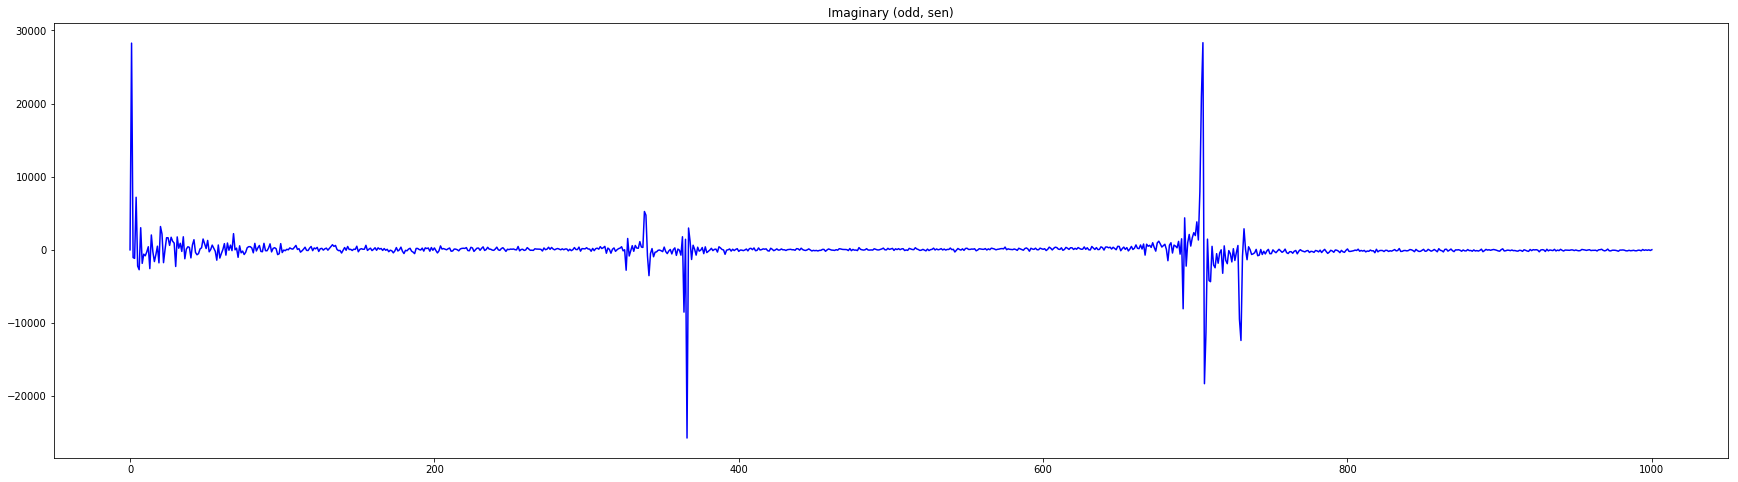

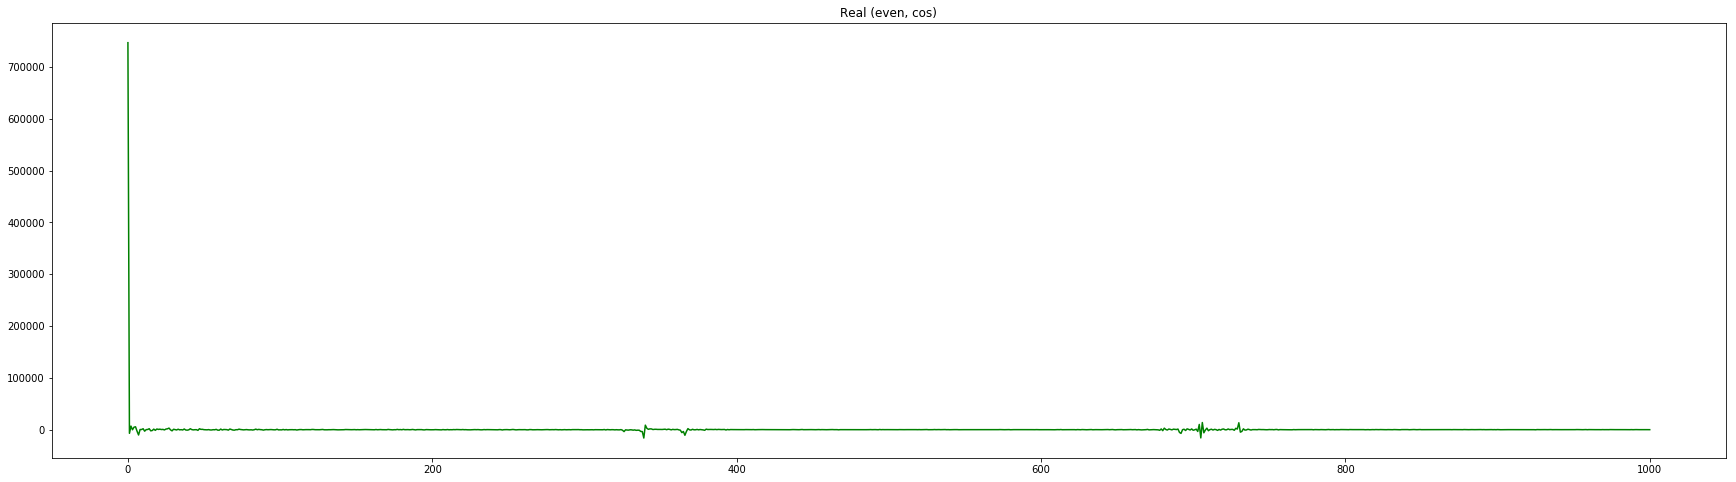

In [5]:
def FFT(datos,N,L):
    xft = np.fft.fft(datos)
    W = np.fft.fftfreq(N,L/N)
    return xft,W

def p4(xft,w,L):
    W=w*L   
    imag=np.imag(xft)
    real=np.real(xft)
    x_1000=[]
    yi_1000=[]
    yr_1000=[]
    contador=0
    for i in W:
        if 0<=i<=1000:
            x_1000.append(i)
            yi_1000.append(imag[contador])
            yr_1000.append(real[contador])
        contador+=1
    
    plt.figure(figsize=(30,8))    
    plt.plot(x_1000,yi_1000,color='blue')
    plt.title('Imaginary (odd, sen)')
    plt.show()
    
    plt.figure(figsize=(30,8))
    plt.plot(x_1000,yr_1000,color='green')
    plt.title('Real (even, cos)')
    plt.show()
    return x_1000,yi_1000,yr_1000
    
FFT2013=FFT(p2(rawData),len(p2(rawData)),2*np.pi) 
FFT20131000=p4(FFT2013[0],FFT2013[1],2*np.pi)

**Problem 5.**

In [6]:
def p5(xft,w,n):
    topnidx=np.argsort(xft)[:n*2]
    topn=[]
    for i in topnidx:
        if w[i]>0:
            topn.append(((1/60)*w[i]*2*np.pi))
    return np.array(topn)

top30Real=p5(np.real(FFT2013[0]),FFT2013[1],30)
top30Imag=p5(np.imag(FFT2013[0]),FFT2013[1],30)
           
print(top30Real)
print(top30Imag)

[  5.65        11.75         6.1          0.11666667  11.53333333
   0.01666667  11.78333333   6.06666667  11.51666667  12.18333333
   5.43333333   5.63333333   6.08333333   5.61666667  11.71666667
   6.11666667  12.2          0.1          0.18333333   0.48333333   0.25
  11.83333333  11.33333333  11.58333333   0.26666667  11.93333333
   0.76666667   5.56666667   0.3         11.3       ]
[  6.1         11.76666667  12.16666667  11.78333333  12.15         6.06666667
  11.53333333  11.83333333  11.81666667   5.68333333  11.96666667
   5.43333333   0.1          0.21666667  11.88333333   0.5         11.56666667
   0.08333333  11.86666667  12.01666667   0.13333333  11.91666667
   0.31666667   0.36666667  12.06666667   0.26666667  11.36666667  12.1
  12.        ]


**a) What are the top five frequencies that represent our data (in hours)?**
5.65        11.75         6.1          0.11666667  11.53333333 Real
6.1         11.76666667  12.16666667  11.78333333  12.15         6.06666667 Imag

**b)  Can we relate some of the top frequencies with some tidal constituents (which ones, name at least 3)?**
Ms4=6.1 Shallow water quarter diurnal
K2=11.96 Lunisolar semidiurnal
L2= 12.19 Smaller lunar elliptic semidiurnal

/usr/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


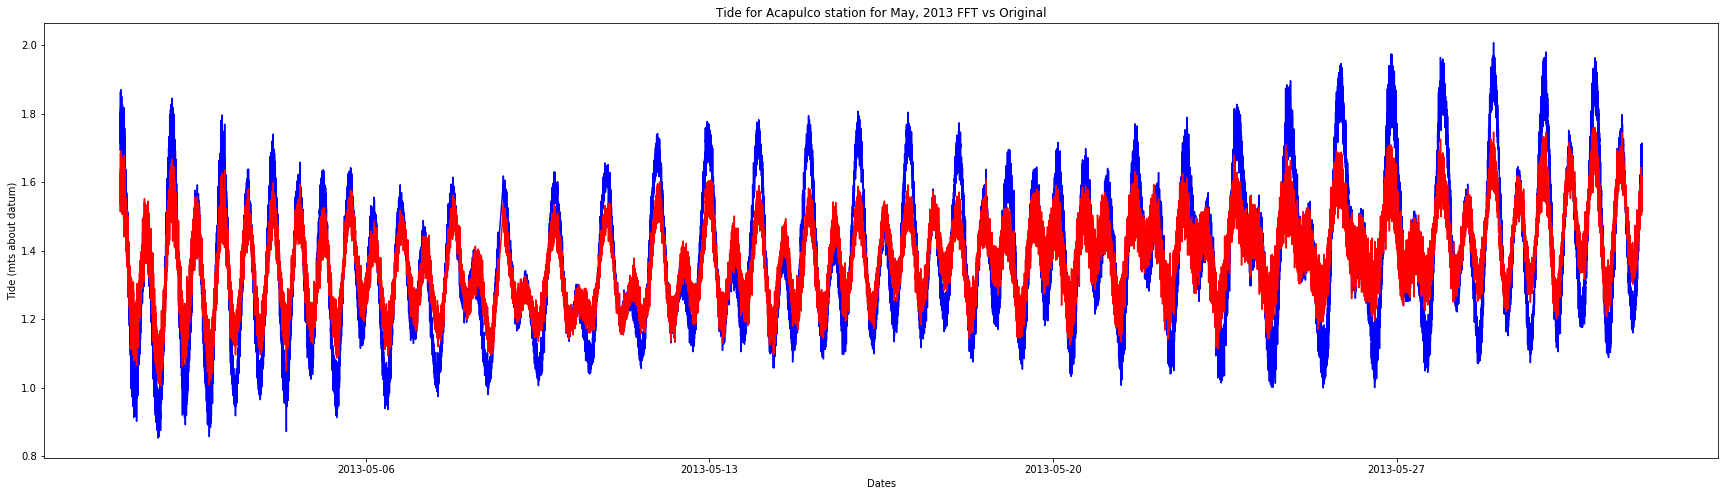

In [10]:
def makeZero(xft,w,primerasN):
    topNhoras=np.argsort(xft)[:primerasN*2]
    for i in topNhoras:
        xft[i]=0
    return xft

def infft(xft):
    xift =  np.fft.ifft(xft)
    return xift


def p6(xft,w,primerasN,fechas,numMes):
    zero=makeZero(xft,w,primerasN)
    inv=infft(zero)
    graf=sacaUnMes(fechas,inv,numMes)
    mayo=sacaUnMes(p1(rawData),p2(rawData),5)
    plt.figure(figsize=(30,8))
    plt.plot(mayo[0],mayo[1],color='b')
    plt.plot(graf[0],graf[1],color='r')
    plt.title('Tide for Acapulco station for May, 2013 FFT vs Original')
    plt.xlabel('Dates')
    plt.ylabel('Tide (mts about datum)')
    plt.savefig('tide.png',dpi=400) 
    return plt.show()
    

limpia=p6(FFT2013[0],FFT2013[1],10,p1(rawData),5)